In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from skimage.io import imread

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, BatchNormalization, Dense, Dropout

# Monitoring and Improving Neural Networks
## Live Demos

In [3]:
test_image = imread("./Lenna.png")

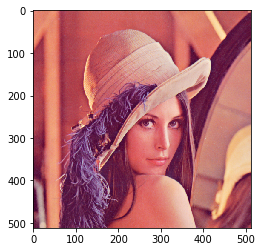

In [4]:
plt.imshow(test_image)

In [5]:
test_image.shape

(512, 512, 3)

In [6]:
test_image[0,0]

array([226, 137, 125], dtype=uint8)

In [7]:
test_image[: , :, 1].shape

(512, 512)

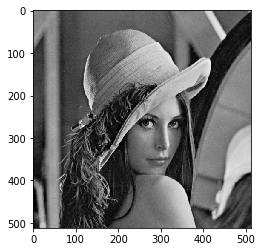

In [8]:
plt.imshow(test_image[: , :, 1], cmap="gray")

In [9]:
conv_model = Sequential([
    Input(shape = (512, 512, 3)),
    Conv2D(filters = 64, kernel_size = 3, padding = "same", activation = "relu"),
    Conv2D(filters = 64, kernel_size = 3, padding = "same", activation = "relu"),
    MaxPool2D(),
    Conv2D(filters = 128, kernel_size = 3, padding = "same", activation = "relu"),
    Conv2D(filters = 128, kernel_size = 3, padding = "same", activation = "relu"),
    MaxPool2D(),
    Conv2D(filters = 256, kernel_size = 3, padding = "same", activation = "relu"),
    Conv2D(filters = 256, kernel_size = 3, padding = "same", activation = "relu"),
    MaxPool2D(),
    # Second part of the model
    Flatten(),
    BatchNormalization(),
    Dense(20, activation = "relu"),
    Dropout(0.1),
    Dense(15, activation = "relu"),
    Dropout(0.1),
    Dense(1, activation = "sigmoid")
])

In [10]:
conv_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 512, 512, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 512, 512, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 256, 256, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 256, 256, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 256, 256, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 128, 128, 128)     0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 128, 128, 256)     2

In [11]:
# For the First part only
# conv_model.layers[-1]

In [12]:
# For the First part only
# conv_model.layers[-2].weights
# conv_model.layers[-2].kernel.numpy()

In [13]:
# First part of the filter only - convolutional
conv_model_1 = Sequential([
    Input(shape = (512, 512, 3)),
    Conv2D(filters = 64, kernel_size = 3, padding = "same", activation = "relu"),
    Conv2D(filters = 64, kernel_size = 3, padding = "same", activation = "relu"),
    MaxPool2D(),
    Conv2D(filters = 128, kernel_size = 3, padding = "same", activation = "relu"),
    Conv2D(filters = 128, kernel_size = 3, padding = "same", activation = "relu"),
    MaxPool2D(),
    Conv2D(filters = 256, kernel_size = 3, padding = "same", activation = "relu"),
    Conv2D(filters = 256, kernel_size = 3, padding = "same", activation = "relu"),
    MaxPool2D(),
    Conv2D(filters = 3, kernel_size = 3, padding = "same", activation = "relu")
])

In [14]:
conv_model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 512, 512, 64)      1792      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 512, 512, 64)      36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 256, 256, 64)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 256, 256, 128)     73856     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 256, 256, 128)     147584    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 128, 128, 128)     0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 128, 128, 256)    